In [1]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
A   = torch.rand(2) * 0.5 + 0.5
phi = torch.rand(2) * torch.pi/2
t   = torch.arange(0,10,1e-3)
T1  = 0.323
T2  = 0.5
X   = A[0] * torch.sin(2*torch.pi*t / T1 + phi[0]) + A[1] * torch.sin(2*torch.pi*t / T2 + phi[1])

In [3]:
def second_order_volterra(X):

    t_k   = torch.arange(0,0.5, 1e-3)
    a     = torch.rand(2)*2 - 1
    b     = torch.rand(2)*0.2 + 0.1
    k1bar = a[0] * torch.exp(-t_k/b[0]) + a[1] * torch.exp(-t_k/b[1])
    k1    = k1bar / torch.norm(k1bar, p = 1)

    u,v   = torch.rand(2)*24-12
    uv    = torch.sqrt(1+u**2+v**2)
    sigma = torch.tensor([[uv+u, v],[v, uv-u]])
    tau   = torch.arange(0,0.5, 1e-3)
    t1,t2 = torch.meshgrid(tau, tau)
    temp  = torch.stack((t1, t2), axis = -1)
    k2bar = torch.exp(-((temp @ sigma**(-1)) * temp).sum(axis = -1).reshape(500,500)/24)
    k2    = k2bar / torch.norm(k2bar, p = 1) * 14

    Y = torch.zeros(X.shape)
    idx = torch.arange(499,-1, -1)

    for i in range(500, len(X)):
        x1, x2 = torch.meshgrid(X[i-500:i], X[i-500:i])
        Y[i] = k1[idx] @ X[i-500:i] + torch.sum(k2[torch.meshgrid(idx, idx)] * x1 * x2)

    return Y

In [4]:
a = torch.rand(2)*2 - 1
b = torch.rand(2)*0.2 + 0.1
t_k = torch.arange(0,0.5, 1e-3)

k1bar = a[0] * torch.exp(-t_k/b[0]) + a[1] * torch.exp(-t_k/b[1])
k1 = k1bar / torch.norm(k1bar, p = 1)

In [31]:
u,v   = torch.rand(2)*24-12
uv    = torch.sqrt(1+u**2+v**2)
sigma = torch.tensor([[uv+u, v],[v, uv-u]])

tau   = torch.arange(0,0.5, 1e-3)
t1,t2 = torch.meshgrid(tau, tau)
temp  = torch.stack((t1, t2), axis = -1)
# k2bar = torch.exp(-((temp @ sigma**(-1)) * temp).sum(axis = -1).reshape(500,500)/24)
# k2    = k2bar / torch.norm(k2bar, p = 1) * 14
k2bar = torch.exp(-((temp @ sigma**(-1)) * temp).sum(axis = -1).reshape(500,500)/24)
k2    = k2bar / torch.norm(k2bar, p = 1) * 14

# # for-loop sanity check
# k2bar2 = torch.zeros(500,500)
# for i in range(500):
#     for j in range(500):
#         temp = torch.tensor([[tau[i], tau[j]]])
#         k2bar2[i,j] = torch.exp(- temp @ sigma**(-1) @ temp.T / 24)

In [6]:
X.shape

torch.Size([10000])

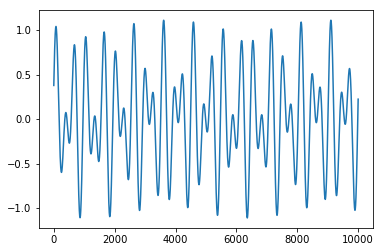

In [7]:
plt.plot(X)

In [9]:
ls

ergo.ipynb          random_player.py    snn_spikes.pdf
ergo_MG.ipynb       snndata_gen.ipynb   traditional_reservoir.ipynb
include_test.ipynb  snn_dict.pkl        volterra_data_gen.ipynb
mackeyglass.mat     snn_inc_test.ipynb


In [10]:
import sys
sys.path.append("/home/rzhu/Documents/nwn_l2l/nwnTorch/")

In [11]:
from nwnTorch.misc import *

In [25]:
X, _, = pkl_load("/home/rzhu/data_access/l2l_data/volterra_data/pair_0.pkl")

In [32]:
# Y = torch.zeros(10000)
Y = torch.zeros(X.shape)
idx = torch.arange(499,-1, -1)

for i in range(500, len(X)):
    x1, x2 = torch.meshgrid(X[i-500:i], X[i-500:i])
    Y[i] = k1[idx] @ X[i-500:i] + torch.sum(k2[torch.meshgrid(idx, idx)] * x1 * x2)

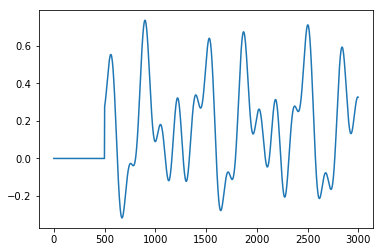

In [34]:
plt.plot(Y)

In [110]:
## for-loop sanity check again
# Z = torch.zeros(3000)
# for i in tqdm(range(500 , 550)):
#     second = 0
#     tempx = X[i-500:i]
#     for j1 in range(500):
#         for j2 in range(500):
#             second = second + k2[j1,j2] * tempx[499-j1] * tempx[499-j2]

#     Z[i] = k1[idx] @ X[i-500:i] + second

In [41]:
y1 = second_order_volterra(X)

In [42]:
y2 = second_order_volterra(X)

In [43]:
y2.shape

torch.Size([3000])

In [19]:
pair = torch.stack((X, y1))

In [20]:
pair.shape

torch.Size([2, 10000])

In [21]:
def pkl_save(obj, filename = None, NASN = False, user = 'rzhu'):
    if filename is None:
        import time
        filename = time.strftime("%Y-%m-%d-%H%M%S") + '_tmp_file.pkl'
    if NASN:
        filename = f'/project/NASN/{user}/'+filename
    
    try: 
        from pickle5 import dump, HIGHEST_PROTOCOL
    except:
        from pickle import dump, HIGHEST_PROTOCOL

    with open(filename, 'wb') as handle:
        dump(obj, handle, protocol = HIGHEST_PROTOCOL)


In [45]:
data_path = "/home/rzhu/data_access/l2l_data/volterra_data/"

In [46]:
for i in tqdm(range(100,200)):
    temp = second_order_volterra(X)
    pair = torch.stack((X, temp))
    pkl_save(pair, data_path + f"pair_{i}.pkl")
    # break

100%|██████████| 100/100 [00:47<00:00,  2.11it/s]


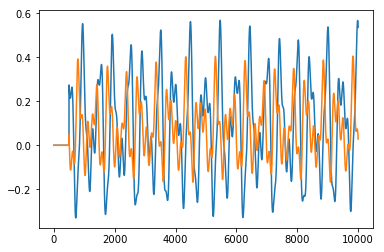

In [16]:
plt.plot(y1)
plt.plot(y2)

Text(0.5, 0, 'Time')

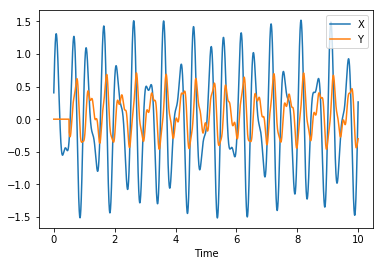

In [10]:

plt.plot(t,X, label = "X")
plt.plot(t,Y, label = "Y")
plt.legend()
plt.xlabel("Time")

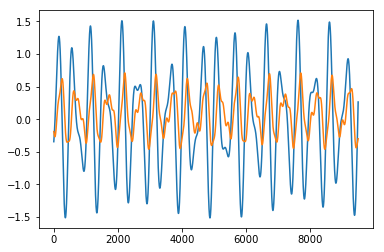

In [12]:
plt.plot(X[500:], label = "X")
plt.plot(Y[500:], label = "Y")
# plt.savefig("volterra_2.pdf")

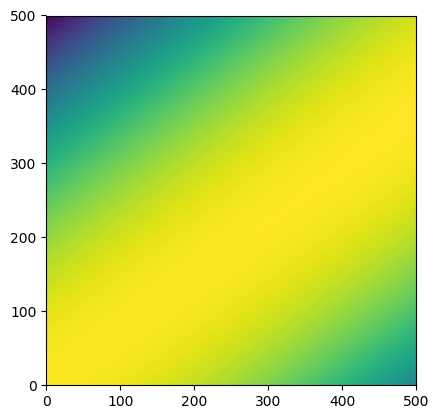

In [93]:
plt.imshow(k2, origin="lower")